### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [10]:
data.shape

(1340, 7)

In [11]:
#Dropping the CASENUM column
data.drop(['CASENUM'], axis=1, inplace=True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [12]:
data.shape

(1340, 6)

In [13]:
#Checking the description
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [15]:
#Checking for missing values
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:
#data['CLMSEX'] = data['CLMSEX'].fillna()
#data['CLMINSUR'] = data['CLMINSUR'].fillna()


In [19]:
data.CLMSEX.value_counts()

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

In [17]:
data.CLMSEX.value_counts().index[0]

1.0

In [21]:
data.CLMINSUR.value_counts().index[0]

1.0

In [25]:
#Creating a user-defined function for imputing the missing values
#with mode(numerical & categorical data)
def fill_na(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col
data.apply(lambda col:fill_na(col))
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

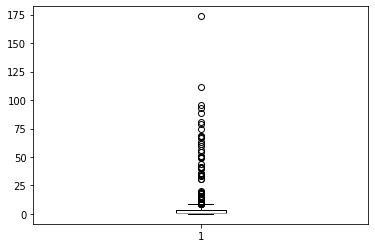

In [28]:
#Loss column #Datapoint<Q
plt.boxplot(data.LOSS)
plt.show()

--> Data Entry mistake
1. outliers also missing values-->Imputation
2. Winsorization--> Outliers are replaced with small values
example:[1,2,3,4,5,6,78,89,_9000]--> 9000 as an outlier--> 9000 will be replaced with 89
One analysis--> including outliers
one analysis-->drop all the outliers

In [33]:
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [32]:
data.iloc[1:] #indices of the columns which we need to xis

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
5,0,1.0,1.0,0.0,35.0,0.309
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,10.0,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [30]:
#Split the data into input and output
X = data.iloc[:,1:]
y = data.ATTORNEY


In [34]:
#Split the data into training and testing
#Build the model on traning data and check the model performance on test data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [36]:
#Build the classifier on training data
#SKlearn library: import, instantiate, fit
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train) #input and output will be passes to the fit method

D:\Users\kc\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#Predicting on train data
#Syntax: objectName.predict(Input)
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

y_train(Actual Values) and y_train_pred(Predicted Values
                                    

In [39]:
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [40]:
#Confusion matrix for training data
#Confusion matrix(Actual values, predicted values)
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_train, y_train_pred)
conf

array([[315, 170],
       [107, 346]], dtype=int64)

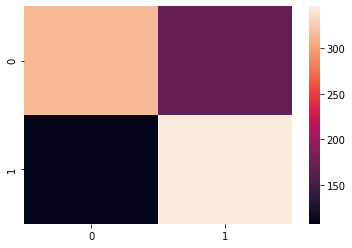

In [41]:
sns.heatmap(conf)

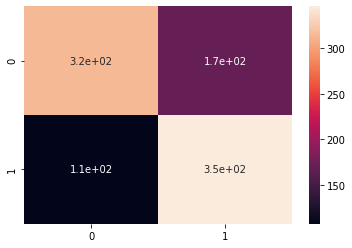

In [44]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)

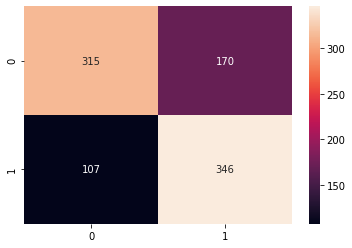

In [45]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f')

In [52]:
conf

array([[315, 170],
       [107, 346]], dtype=int64)

In [53]:
conf[0][0]
conf[0][1]

170

In [55]:
#Accesing the values of confusion matrix with row and column index
print('true_positive=', conf[0][0])
print('falsee_positive=', conf[0][1])
print('false_negative=', conf[1][0])
print('true_negative=', conf[1][1])

true_positive= 315
falsee_positive= 170
false_negative= 107
true_negative= 346


In [ ]:
1-->Hiring an attorney
0-->Not hiring an attorney
Number of false positives

In [46]:
#Accuracy -->TP+TN/TP+FP+TN+FN
#Total number of predictions
(315+345)/(315+170+108+345)

0.7036247334754797

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.7046908315565032

In [59]:
true_positive=conf[0][0]
false_positive=conf[0][1]
false_negative = conf[1][0]
true_negative = conf[1][1]

In [60]:
#Precison rate
Precision = true_positive/(true_positive+false_positive)
Precision

0.6494845360824743

In [61]:
from sklearn.metrics import precision_score
precision_score(y_train, y_train_pred)

0.6705426356589147

In [64]:
#Out of all the actual values, how many are correctly classified
Recall = true_positive/(true_positive+false_negative)
Recall

0.7464454976303317

In [65]:
#Calculation f1-score for the model
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.7141382868937047

In [ ]:
#Prediction on test data
#Claculate the metrics for test data--> confusion matrix
#Precision, Recall, f1-Score
#Compare the score with traning data